# A. Assignment details

## 1.1 Download data

Thesis statement: "The greater the number of researchers per million population, the greater the GDP per capita."

In the neoclassical growth model, technological progress results in long-term economic growth. In this notebook, I test this empirically. Here, technological progress is measured by the number of researchers per million population. I assume that the greater the number of researchers, the faster the rate of technological progress. This, in turn, results in higher economic growth, which is measured by GDP per capita.

Possible weakness of the research: It is possible that the higher the GDP per capita, the more funds a country can invest in research and therefore more people will find STEM a viable career choice. (I still don't know how to account for this.)

This notebook downloads the following data from "Our World in Data":
- GDP per capita
- Number of researchers per million people

After processing the data, this will produce scatter plots for each year. The regression line and regression coefficient are also included for each plot.

Results:
- There is some connection between number of researchers and GDP per capita. However, there are also outlier countries (mostly oil producing states, such as Qatar, Kuwait, Oman) with high GDP per capita despite low number of researchers per million population. 

In [ ]:
import pandas as pd

def getWorldInData(url):
    df = pd.read_csv(url, storage_options = {'User-Agent': 'Our World In Data data fetch/1.0'})
    return df

numres_url = "https://ourworldindata.org/grapher/researchers-in-rd-per-million-people.csv?v=1&csvType=full&useColumnShortNames=true"
gdp_url = "https://ourworldindata.org/grapher/gdp-per-capita-maddison-project-database.csv?v=1&csvType=full&useColumnShortNames=true"

df_numres = getWorldInData(numres_url)
df_gdp = getWorldInData(gdp_url)


,Entity,Code,Year,gdp_per_capita,900793-annotations
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN


## 1.2 Manipulate Data

In [ ]:
df_numres = df_numres.rename({"Code":'country', "sp_pop_scie_rd_p6":'res_per_mil', "Year":'year'}, axis=1)
df_gdp = df_gdp.rename({"Code":'country', "Year":'year'}, axis=1)

## 1.3 Merge Data

In [25]:
df_main = pd.merge(
    df_numres[['country', 'year', 'res_per_mil']], 
    df_gdp[['country', 'year', 'gdp_per_capita']],
    on=['country', 'year'],
    how='inner' 
)

#remove those with missing data points
df_main = df_main.dropna()



## Visualization

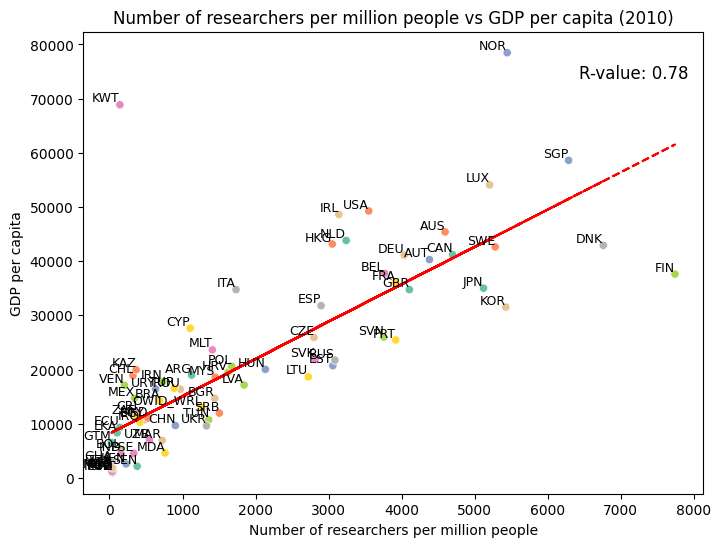

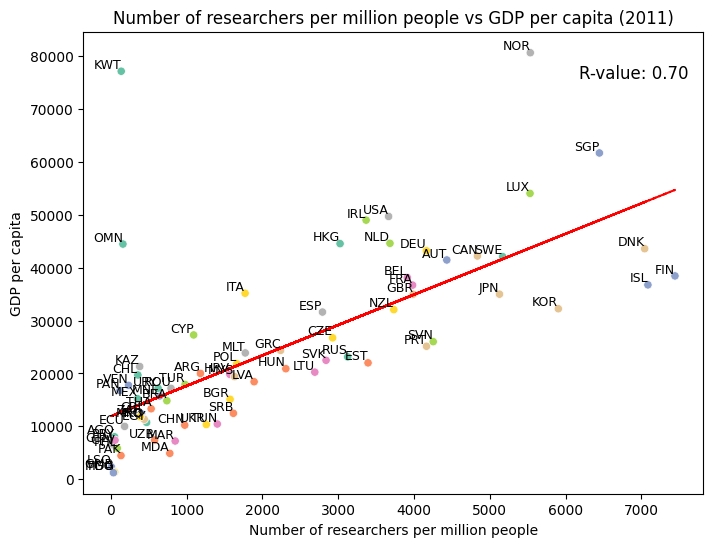

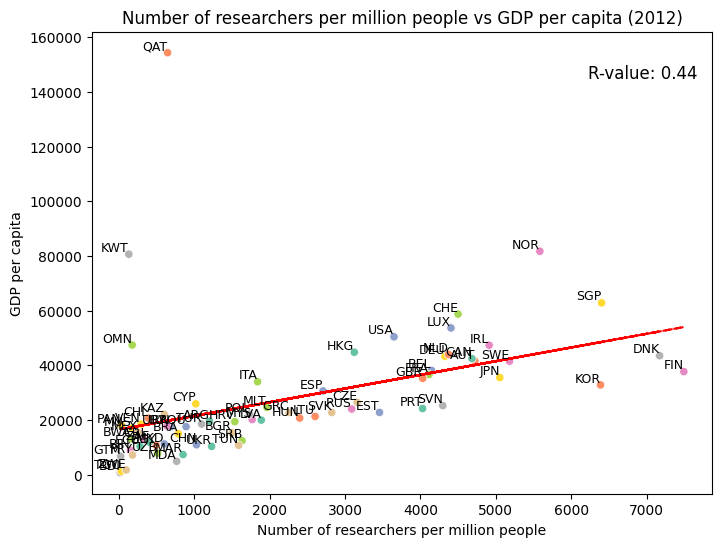

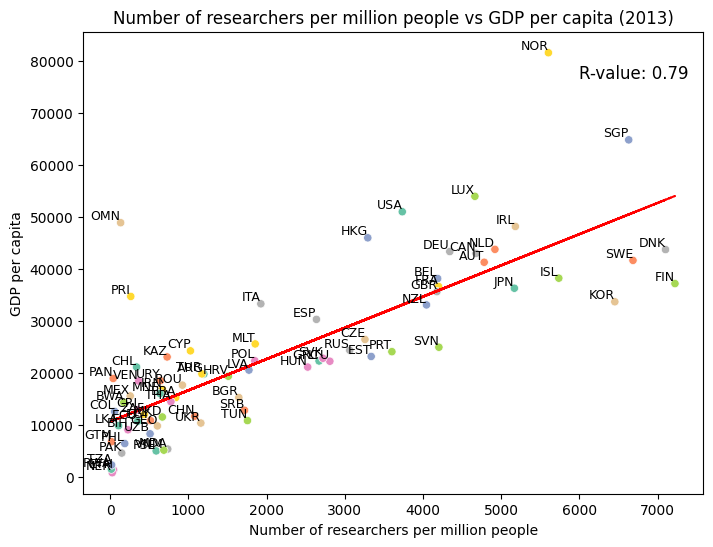

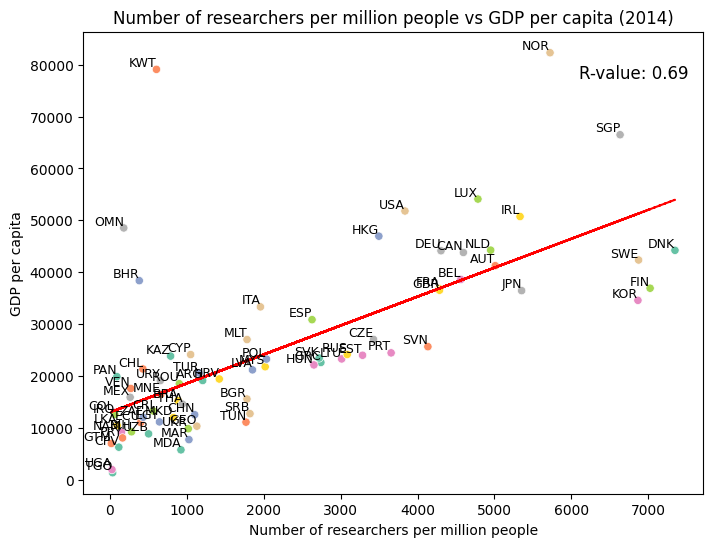

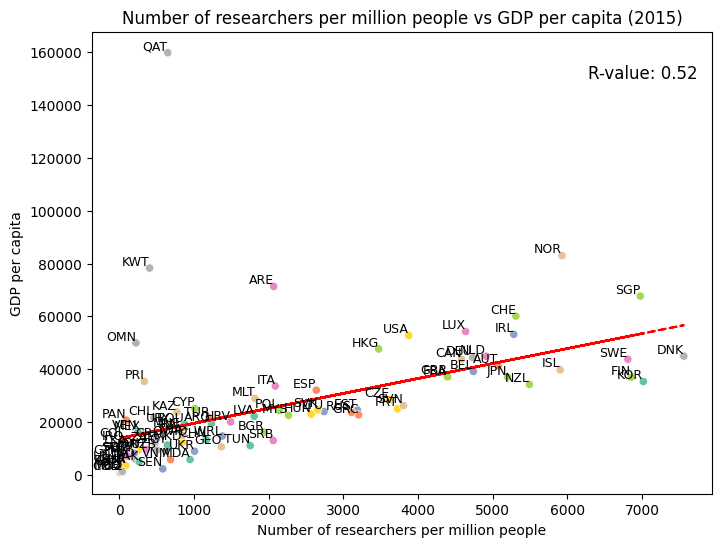

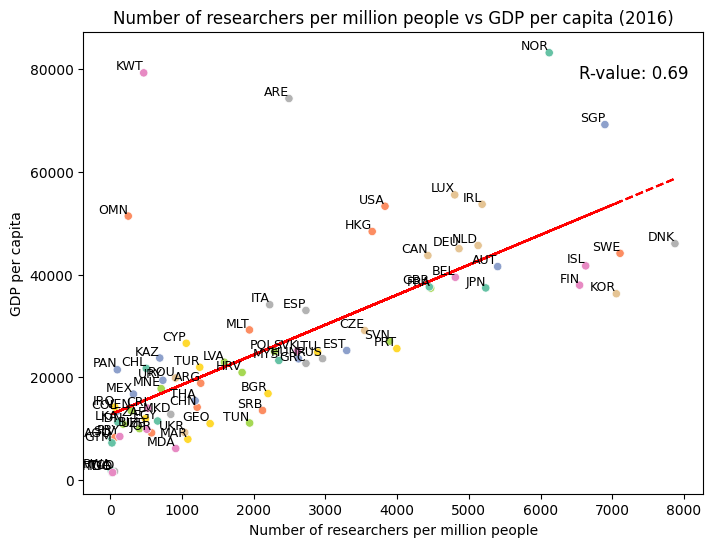

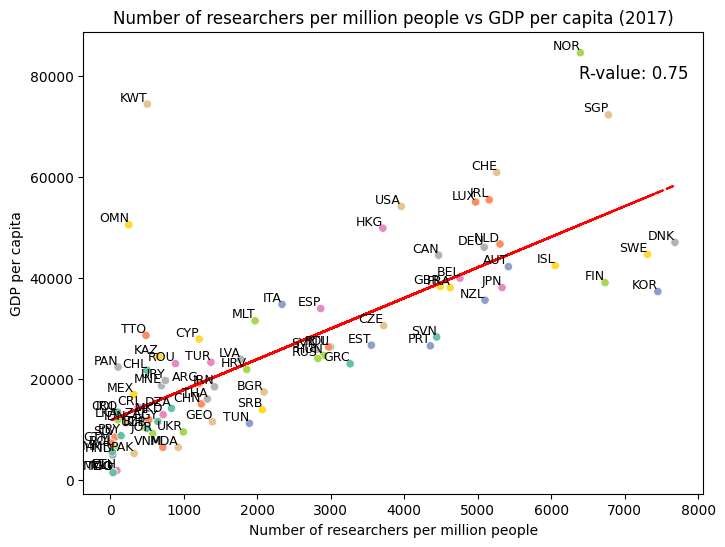

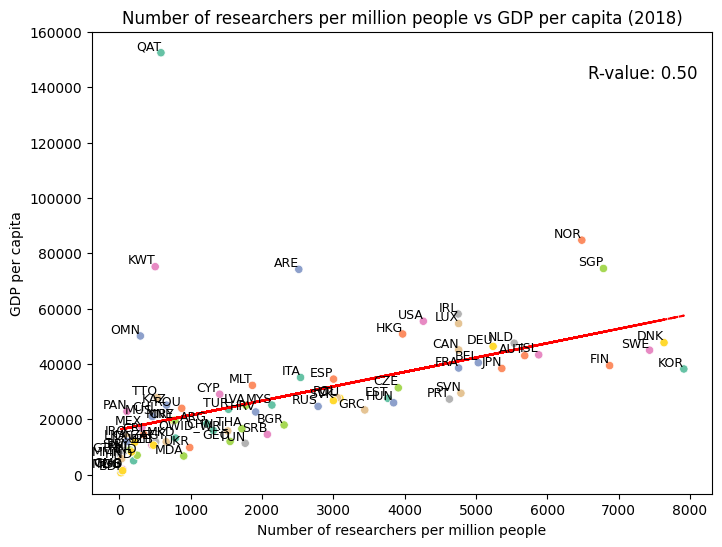

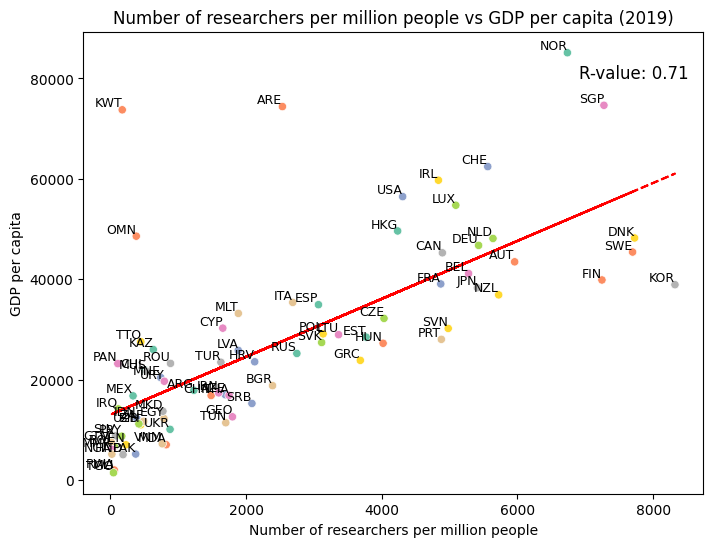

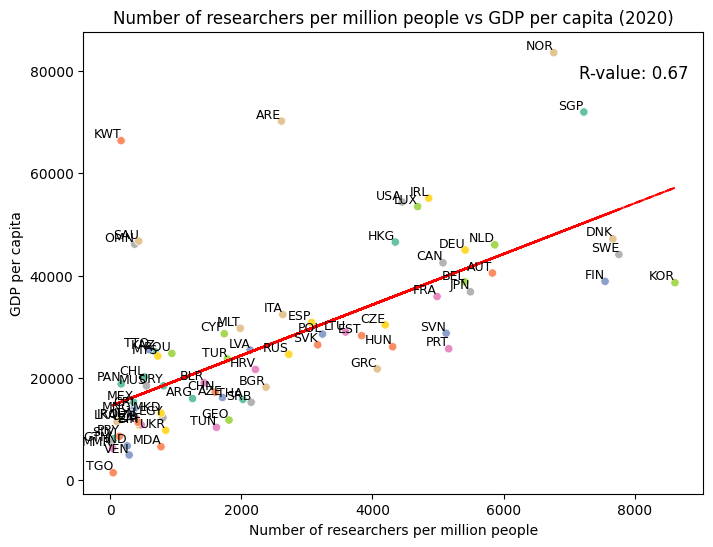

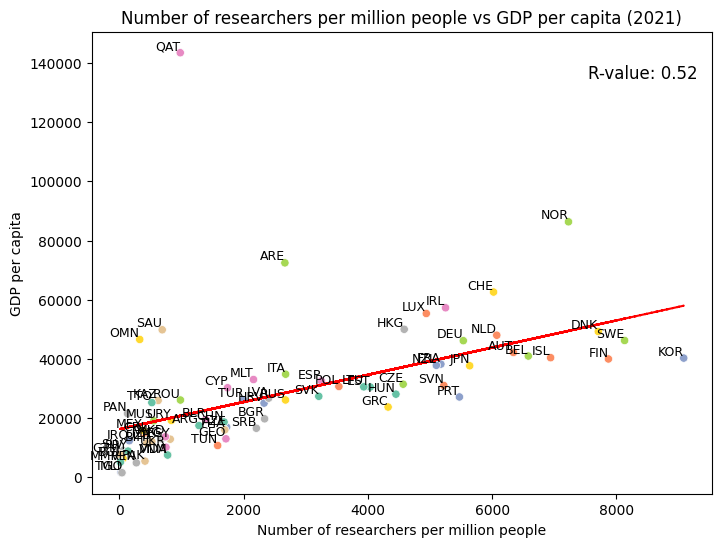

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

start_year = 2010
end_year = 2022 #end_year is excluded, last value for the for-loop is end_year - 1

for year in range(start_year, end_year): 
    
    # Filter the dataframe for the current year (all countries)
    df_filtered = df_main[df_main['year'] == year]
    
    # Skip the loop iteration if there's no data for that year
    if df_filtered.empty:
        continue

    # Plot for the current year, color by 'country'
    plt.figure(figsize=(8,6))
    ax = sns.scatterplot(data=df_filtered, x='res_per_mil', y='gdp_per_capita', hue='country', palette='Set2', legend=False)

    # Calculate the regression line and coefficient using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(df_filtered['res_per_mil'], df_filtered['gdp_per_capita'])
    
    # Plot the regression line
    x_vals = df_filtered['res_per_mil']
    y_vals = slope * x_vals + intercept
    ax.plot(x_vals, y_vals, color='red', linestyle='--', label=f'Reg. line (Slope: {slope:.2f})')
    
    # Annotate the R-value (correlation coefficient); place on the upper right
    ax.text(0.8, 0.9, f'R-value: {r_value:.2f}', transform=ax.transAxes, fontsize=12, color='black')

    # Annotate each point with its country code (ISO code)
    for i in range(len(df_filtered)):
        ax.text(
            df_filtered['res_per_mil'].iloc[i],  # x position
            df_filtered['gdp_per_capita'].iloc[i],  # y position
            df_filtered['country'].iloc[i],  # Country code (ISO)
            fontsize=9,  # Adjust font size if necessary
            ha='right',  # Horizontal alignment of text
            va='bottom',  # Vertical alignment of text
            color='black'  # Color of the text
        )

    plt.xlabel('Number of researchers per million people')
    plt.ylabel('GDP per capita')
    plt.title(f'Number of researchers per million people vs GDP per capita ({year})')
    plt.grid(False)
    plt.show()

